## Isolation Forest for Anomaly Detection
**Objective**: Understand and apply the Isolation Forest algorithm to identify anomalies in datasets.

### Task: Anomaly Detection in Financial Transactions
**Steps**:
1. Import Libraries
2. Load Dataset
3. Apply Isolation Forest
4. Visualize Anomalies

   transaction_amount  transaction_time
0          109.934283         97.234714
1          112.953771        130.460597
2           95.316933         95.317261
3          131.584256        115.348695
4           90.610512        110.851201


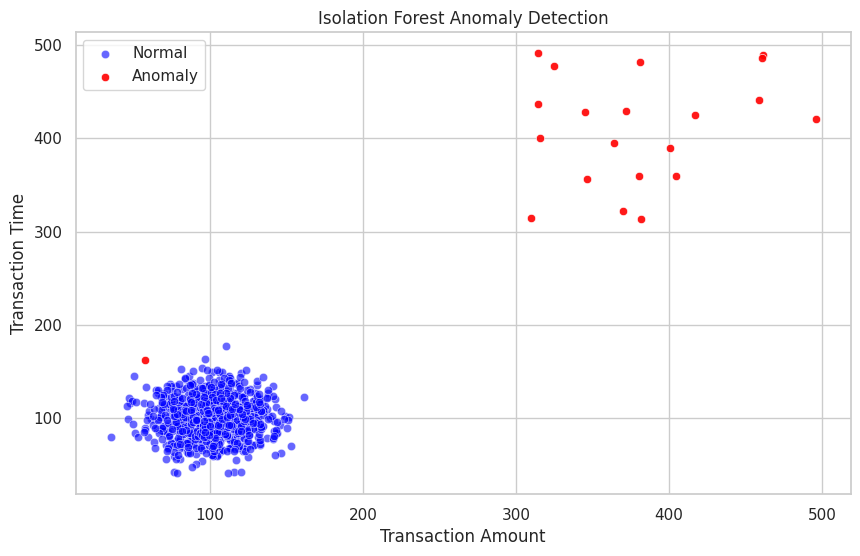

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
# Synthetic data: 1000 normal transactions + 20 anomalies
rng = np.random.RandomState(42)

# Normal transactions (mostly between $10-$200)
normal_data = rng.normal(loc=100, scale=20, size=(1000, 2))
# Introduce anomalies with much higher amounts or outlier feature values
anomalies = rng.uniform(low=[300, 300], high=[500, 500], size=(20, 2))

# Combine into one dataset
data = np.vstack([normal_data, anomalies])
df = pd.DataFrame(data, columns=['transaction_amount', 'transaction_time'])

print(df.head())
# Initialize the model
iso_forest = IsolationForest(contamination=0.02, random_state=42)

# Fit model
iso_forest.fit(df)

# Predict anomalies (-1 means anomaly, 1 means normal)
df['anomaly'] = iso_forest.predict(df)
plt.figure(figsize=(10, 6))

# Normal transactions
sns.scatterplot(x='transaction_amount', y='transaction_time',
                data=df[df['anomaly'] == 1],
                label='Normal', color='blue', alpha=0.6)

# Anomalies
sns.scatterplot(x='transaction_amount', y='transaction_time',
                data=df[df['anomaly'] == -1],
                label='Anomaly', color='red', alpha=0.9)

plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Time')
plt.legend()
plt.show()
